In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [2]:
data=pd.read_csv('census.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [4]:
data=data.drop(['education'],axis=1)

In [5]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data=data.apply(lambda x:x.str.strip() if x.dtype == 'object' else x )

In [7]:
data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# in the dataset missing values have been denoted by 
# we are replacing ? with NaN for them to be inputed down the line
data.replace('?',np.NaN,inplace=True)

In [9]:
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [10]:
# using simple imputer to fill the nan 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [11]:
data['workclass']=imputer.fit_transform(data['workclass'].values.reshape(-1,1))
data['occupation']=imputer.fit_transform(data['occupation'].values.reshape(-1,1))
data['native-country']=imputer.fit_transform(data['native-country'].values.reshape(-1,1))

In [12]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [14]:
# exorting the categorical columns for encoding
cat_data=data.select_dtypes(include=['object']).copy()

In [15]:
cat_data.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'income'],
      dtype='object')

In [16]:
cat_data.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [17]:
cat_data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
cat_data['income']=cat_data['income'].map({'<=50K':0,'>50K':1})
cat_data[['income']]

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [28]:
# using the dummy encoding the categorical columns to numerical ones
for col in cat_data.drop('income',axis=1).columns:
    x=cat_data[col].head(1)
    cat_data=pd.get_dummies(cat_data,columns=[col],prefix=[col],drop_first=True)
    

In [30]:
cat_data.head()

,income,workclass_Local-gov_1,workclass_Never-worked_1,workclass_Private_1,workclass_Self-emp-inc_1,workclass_Self-emp-not-inc_1,workclass_State-gov_1,workclass_Without-pay_1,marital-status_Married-AF-spouse_1,marital-status_Married-civ-spouse_1,...,native-country_Portugal_1,native-country_Puerto-Rico_1,native-country_Scotland_1,native-country_South_1,native-country_Taiwan_1,native-country_Thailand_1,native-country_Trinadad&Tobago_1,native-country_United-States_1,native-country_Vietnam_1,native-country_Yugoslavia_1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# extracting the numerical columns
num_data = data.select_dtypes(include=['Int64']).copy()
num_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaled_data=scaler.fit_transform(num_data)
scaled_data

array([[-0.99512893,  0.35167453, -1.19725891, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-0.04694151, -0.94552415, -0.41933527, -0.14480353, -0.2171271 ,
         0.77292975],
       [-0.77631645,  1.3947231 ,  0.74755018, -0.14480353, -0.2171271 ,
        -0.03408696],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-1.21394141,  0.11198424, -0.41933527, -0.14480353, -0.2171271 ,
        -1.64812038],
       [ 0.97418341,  0.93049361, -0.41933527,  1.87131501, -0.2171271 ,
        -0.03408696]])

In [23]:
scaled_num_data=pd.DataFrame(data=scaled_data,columns=num_data.columns)
scaled_num_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104
...,...,...,...,...,...,...
48837,-0.849254,0.640492,0.747550,-0.144804,-0.217127,-0.195490
48838,0.098933,-0.334178,-0.419335,-0.144804,-0.217127,-0.034087
48839,1.411808,-0.357510,-0.419335,-0.144804,-0.217127,-0.034087
48840,-1.213941,0.111984,-0.419335,-0.144804,-0.217127,-1.648120


In [32]:
#combining the numerical and categorical
final_data=pd.concat([scaled_num_data,cat_data],axis=1)
final_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov_1,workclass_Never-worked_1,workclass_Private_1,...,native-country_Portugal_1,native-country_Puerto-Rico_1,native-country_Scotland_1,native-country_South_1,native-country_Taiwan_1,native-country_Thailand_1,native-country_Trinadad&Tobago_1,native-country_United-States_1,native-country_Vietnam_1,native-country_Yugoslavia_1
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [33]:
x=final_data.drop('income',axis=1)
y=final_data.income

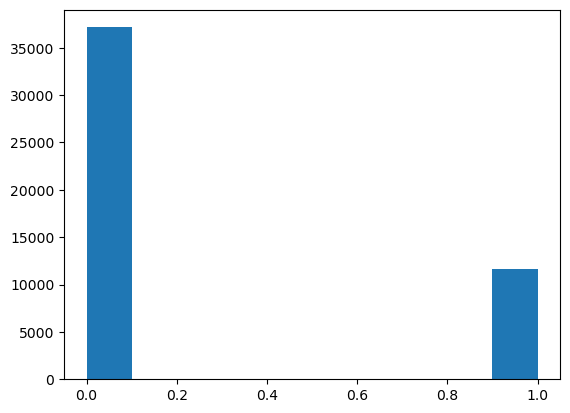

In [34]:
plt.hist(y)
plt.show()

In [38]:
y.value_counts()

0    37155
1    11687
Name: income, dtype: int64

#### hence the dataset is imbalnced we need to introduce some random sampling to make it balanced

In [39]:
rdsmple=RandomOverSampler()
x_sampled,y_sampled=rdsmple.fit_resample(x,y)

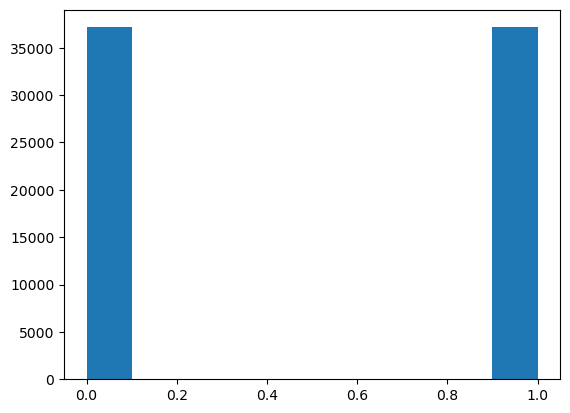

In [36]:
plt.hist(y_sampled)
plt.show()

In [37]:
y_sampled.value_counts()

0    37155
1    37155
Name: income, dtype: int64

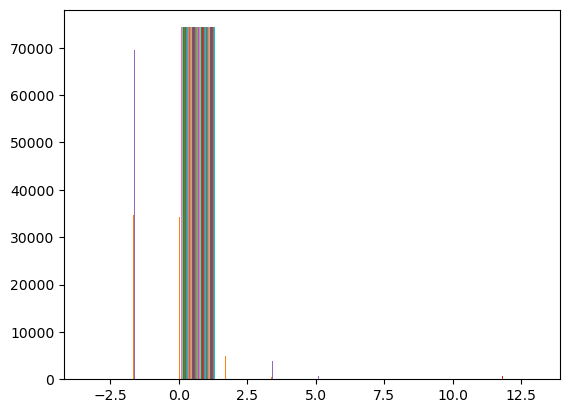

In [41]:
plt.hist(x_sampled)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
gnb=GaussianNB(priors=None,var_smoothing=0.05)

In [44]:
y_pred=gnb.fit(x_train,y_train).predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
sc=accuracy_score(y_test,y_pred)
sc

0.8137043815265368

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid={'var_smoothing':[1e-9,0.1,0.001,0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}

In [49]:
grid=GridSearchCV(estimator=gnb,param_grid=param_grid,cv=5,verbose=3)

In [50]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.705 total time=   0.2s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.697 total time=   0.2s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.709 total time=   0.2s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.704 total time=   0.2s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.693 total time=   0.2s
[CV 1/5] END .................var_smoothing=0.1;, score=0.806 total time=   0.1s
[CV 2/5] END .................var_smoothing=0.1;, score=0.805 total time=   0.2s
[CV 3/5] END .................var_smoothing=0.1;, score=0.797 total time=   0.2s
[CV 4/5] END .................var_smoothing=0.1;, score=0.806 total time=   0.2s
[CV 5/5] END .................var_smoothing=0.1;, score=0.802 total time=   0.2s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.788 total time=   0.2s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=0.05),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [51]:
grid.best_estimator_

GaussianNB(var_smoothing=0.05)